In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

time: 3.48 s (started: 2021-12-10 09:28:51 +00:00)


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 634 ms (started: 2021-12-10 09:28:55 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#url="https://drive.google.com/file/d/1_HgEC6SfcSGCOb9mKUEhuDuqv2jzFqX5/view?usp=sharing"
url="/content/drive/MyDrive/Colab Notebooks/SML_Yelp/Review30k_max_100Tokens_IDs.csv"
Review_df = pd.read_csv(url)
Review_df.head()

,Unnamed: 0,review_id,business_id,text,rating,sentiment,cleaned_tokens_uncased,Token_Count,cleaned_text_uncased,cleaned_tokens_cased,cleaned_text_cased
0,205926,74jiSYdvwgNW88yb0iDU_g,H61GvE_VbTXtQbEgTPLchg,This place has made HUGE improvements since it...,5.0,1,"['This', 'place', 'has', 'made', 'HUGE', 'impr...",78.0,this place has made huge improvements since it...,"['this', 'place', 'has', 'made', 'huge', 'impr...",This place has made HUGE improvements since it...
1,7245869,s8S_soPpe6kYiQHz8fA22A,bleghpKXVyrPo7uIOR9LEA,The place is clean and quiet Im surprised by ...,5.0,1,"['The', 'place', 'is', 'clean', 'and', 'quiet'...",84.0,the place is clean and quiet im surprised by ...,"['the', 'place', 'is', 'clean', 'and', 'quiet'...",The place is clean and quiet Im surprised by ...
2,3437653,bV3xsi04F6f9by1rntyS9g,D-RczFIzH_h2POcQU4iGLg,After leaving The Bailey Wine Cellar I stopped...,4.0,1,"['After', 'leaving', 'The', 'Bailey', 'Wine', ...",65.0,after leaving the bailey wine cellar i stopped...,"['after', 'leaving', 'the', 'bailey', 'wine', ...",After leaving The Bailey Wine Cellar I stopped...
3,3238765,iRAsaL4yUYyThkUGs4_p8A,4CxF8c3MB7VAdY8zFb2cZQ,If you are new to Voodoo Doughnut order the cl...,5.0,1,"['If', 'you', 'are', 'new', 'to', 'Voodoo', 'D...",89.0,if you are new to voodoo doughnut order the cl...,"['if', 'you', 'are', 'new', 'to', 'voodoo', 'd...",If you are new to Voodoo Doughnut order the cl...
4,873504,dW8kuISsYlJk9wwN-XdxKw,ZdEohT36LcY3eKh4fJMGRQ,We catered lunch from Cafe Agora Food quality ...,4.0,1,"['We', 'catered', 'lunch', 'from', 'Cafe', 'Ag...",32.0,we catered lunch from cafe agora food quality ...,"['we', 'catered', 'lunch', 'from', 'cafe', 'ag...",We catered lunch from Cafe Agora Food quality ...


time: 707 ms (started: 2021-12-10 09:28:55 +00:00)


In [ ]:
Review_df=Review_df.dropna(subset=['text'])

time: 24 ms (started: 2021-12-10 09:28:56 +00:00)


In [ ]:
Review_df.shape

(30005, 11)

time: 5.51 ms (started: 2021-12-10 09:28:56 +00:00)


In [ ]:
Review_df.head()

,Unnamed: 0,review_id,business_id,text,rating,sentiment,cleaned_tokens_uncased,Token_Count,cleaned_text_uncased,cleaned_tokens_cased,cleaned_text_cased
0,205926,74jiSYdvwgNW88yb0iDU_g,H61GvE_VbTXtQbEgTPLchg,This place has made HUGE improvements since it...,5.0,1,"['This', 'place', 'has', 'made', 'HUGE', 'impr...",78.0,this place has made huge improvements since it...,"['this', 'place', 'has', 'made', 'huge', 'impr...",This place has made HUGE improvements since it...
1,7245869,s8S_soPpe6kYiQHz8fA22A,bleghpKXVyrPo7uIOR9LEA,The place is clean and quiet Im surprised by ...,5.0,1,"['The', 'place', 'is', 'clean', 'and', 'quiet'...",84.0,the place is clean and quiet im surprised by ...,"['the', 'place', 'is', 'clean', 'and', 'quiet'...",The place is clean and quiet Im surprised by ...
2,3437653,bV3xsi04F6f9by1rntyS9g,D-RczFIzH_h2POcQU4iGLg,After leaving The Bailey Wine Cellar I stopped...,4.0,1,"['After', 'leaving', 'The', 'Bailey', 'Wine', ...",65.0,after leaving the bailey wine cellar i stopped...,"['after', 'leaving', 'the', 'bailey', 'wine', ...",After leaving The Bailey Wine Cellar I stopped...
3,3238765,iRAsaL4yUYyThkUGs4_p8A,4CxF8c3MB7VAdY8zFb2cZQ,If you are new to Voodoo Doughnut order the cl...,5.0,1,"['If', 'you', 'are', 'new', 'to', 'Voodoo', 'D...",89.0,if you are new to voodoo doughnut order the cl...,"['if', 'you', 'are', 'new', 'to', 'voodoo', 'd...",If you are new to Voodoo Doughnut order the cl...
4,873504,dW8kuISsYlJk9wwN-XdxKw,ZdEohT36LcY3eKh4fJMGRQ,We catered lunch from Cafe Agora Food quality ...,4.0,1,"['We', 'catered', 'lunch', 'from', 'Cafe', 'Ag...",32.0,we catered lunch from cafe agora food quality ...,"['we', 'catered', 'lunch', 'from', 'cafe', 'ag...",We catered lunch from Cafe Agora Food quality ...


time: 37.4 ms (started: 2021-12-10 09:28:56 +00:00)


In [ ]:
Review_df['rating'].unique()
Review_df = Review_df[Review_df['rating'] != 72.0]
Review_df = Review_df[Review_df['rating'] != 79.0]
Review_df = Review_df[Review_df['rating'] != 98.0]

time: 27 ms (started: 2021-12-10 09:28:56 +00:00)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



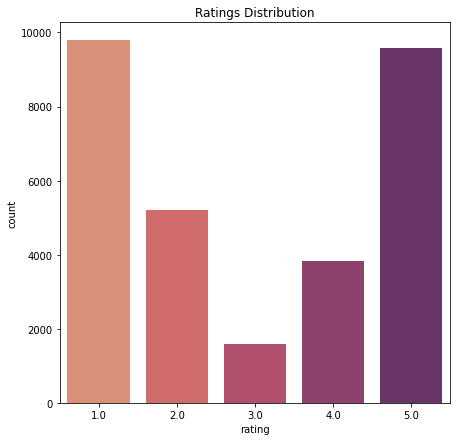

time: 204 ms (started: 2021-12-10 10:07:10 +00:00)


In [ ]:
import seaborn as sns
plt.figure(figsize=(7,7))
ax = sns.countplot(Review_df['rating'],palette='flare')
#ax.set_xlim(1,6)
#ax.set_xticks(range(1,6))
plt.title('Ratings Distribution');

## Word cloud of Reviews




*   Build word cloud of reviews from reviews dataframe
*   Larger font size means higher frequency

*   Uses wordcloud module built by Andreas Mueller. Code available here.
*   Mueller uses scikit-learn's CountVectorizer and extracts the 200 most frequent words, after filtering for 'stopwords' (common English words). More information on his approach available in his blog post.







In [ ]:
review_list = np.array(Review_df['text'])
print('There are {} NaN values in review column'.format(Review_df['text'].isna().sum()))
review_list = np.array(['None' if x is np.nan else x for x in review_list])

There are 0 NaN values in review column
time: 80 ms (started: 2021-12-10 09:28:57 +00:00)


In [ ]:
# Creating txt file (required input for wordcloud) of reviews
with open("reviews.txt", "w") as txt_file:
  for item in review_list:
    if item != "None":
      txt_file.write("".join(item) + "\n")

time: 280 ms (started: 2021-12-10 09:28:57 +00:00)


In [ ]:
# build word cloud
# code in this cell and cell below taken from here: https://github.com/amueller/word_cloud/blob/master/examples/simple.py

import os
from os import path
from wordcloud import WordCloud

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
text = open(path.join(d, '/content/reviews.txt')).read()

wordcloud = WordCloud().generate(text)
plt.figure(figsize=(15, 12))
# display the word cloud (the matplotlib way)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

FileNotFoundError: ignored

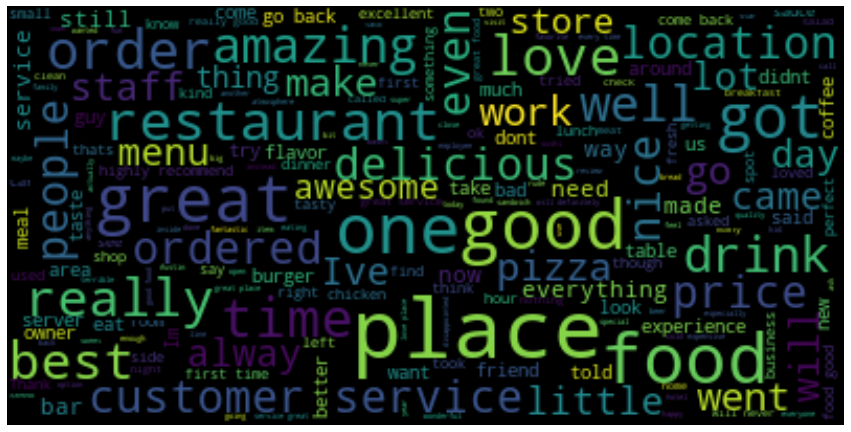

time: 6.62 s (started: 2021-12-10 09:29:04 +00:00)


In [ ]:
# lower max_font_size to show more words and increase figure size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

In [ ]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS
Review_df['WithoutStopWords']=Review_df['text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

time: 448 ms (started: 2021-12-10 09:29:10 +00:00)


In [ ]:
Review_df['WithoutStopWords']

0        this place huge improvements opened it took mo...
1        the place clean quiet im surprised lower revie...
2        after leaving the bailey wine cellar i stopped...
3        if new voodoo doughnut order classic voodoo do...
4        we catered lunch cafe agora food quality excel...
                               ...                        
30019    i needed car wash card readers wouldnt work wa...
30020    i definitely recommend going dublin location t...
30021    extremely terrible customer service even busin...
30022    take order took hour wait outside 30 minutes f...
30023    this specific location disgrace thing chicken ...
Name: WithoutStopWords, Length: 29999, dtype: object

time: 10.1 ms (started: 2021-12-10 09:29:11 +00:00)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
sparse_matrix = count.fit_transform(Review_df['WithoutStopWords'])

rev = sparse_matrix.toarray().sum(axis=0)
# get words
feature_names = count.get_feature_names()

# .argsort() -- returns indices to sort the array
sorted_indices = np.argsort(-rev)
sorted_count = [rev[i] for i in sorted_indices]
sorted_features = [feature_names[i] for i in sorted_indices]
print('Number of features:', len(sorted_features))

print("Top 10 frequently used words for reviews are ")
df = pd.DataFrame({'Count':sorted_count,'Feature':sorted_features })
df.head(10)

Number of features: 34700
Top 10 frequently used words for reviews are 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,Count,Feature
0,13924,the
1,10887,food
2,8879,place
3,8139,good
4,7851,service
5,7730,great
6,5041,time
7,4726,like
8,4498,just
9,4083,this


time: 8.34 s (started: 2021-12-10 09:29:11 +00:00)


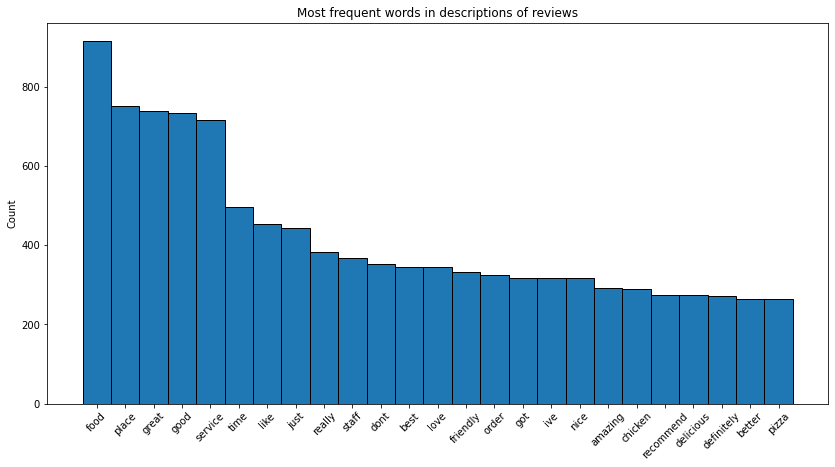

time: 381 ms (started: 2021-12-10 09:51:31 +00:00)


In [ ]:
# build histogram
plt.subplots(1,1,figsize=(14,7))
plt.bar(sorted_features[:25], sorted_count[:25],
        width=1, edgecolor='black')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Most frequent words in descriptions of reviews');

# Plotting 'most important' words in Review


*   'Most important' means a term that occurs frequently in an individual review but is not used too frequently across the entire corpus of smell descriptions.
*   This uses td-idf (Term Frequency - Inverse Document Frequency) and TfidfVectorizer.

In [ ]:
# function for building tfidf vectorizer (code from DS5110 lecture notes, 11-NLP)
from sklearn.feature_extraction.text import TfidfVectorizer

def build_tfidf(num_words, documents):
  vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(num_words, num_words))

  # build sparse matrix using array of smell descriptions
  sparse_matrix = vectorizer.fit_transform(documents)

  feature_names = vectorizer.get_feature_names()

  # convert to ndarray, then sum terms
  a = sparse_matrix.toarray().sum(axis=0)

  # .argsort() -- returns indices to sort the array
  sorted_indices = np.argsort(-a)
  sorted_count = [a[i] for i in sorted_indices]
  sorted_features = [feature_names[i] for i in sorted_indices]
  print('Number of features:', len(sorted_features))
  print('First 50 features:', sorted_features[:50])

  return sorted_features, sorted_count

time: 9.55 ms (started: 2021-12-10 09:29:20 +00:00)


In [ ]:
# function for plotting most frequent terms as a bar chart (code from 11-NLP)
def plot_tfidf(sorted_features, sorted_count):
  plt.subplots(1,1,figsize=(14,10))
  plt.bar(sorted_features[:25], sorted_count[:25],
          width=1, alpha=.5, edgecolor='black')
  plt.xticks(rotation=45)
  plt.ylabel('Count');

time: 2.62 ms (started: 2021-12-10 09:29:20 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Number of features: 34438
First 50 features: ['food', 'place', 'great', 'good', 'service', 'time', 'like', 'just', 'really', 'staff', 'dont', 'best', 'love', 'friendly', 'order', 'got', 'ive', 'nice', 'amazing', 'chicken', 'recommend', 'delicious', 'definitely', 'better', 'pizza', 'come', 'people', 'bad', 'ordered', 'restaurant', 'experience', 'went', 'im', 'customer', 'try', 'wait', 'came', 'didnt', 'did', 'going', 'location', 'minutes', 'little', 'fresh', 'way', 'times', 'pretty', 'make', 'price', 'super']


Text(0.5, 1.0, 'Most important terms in reviews, sorted by frequency (number of words in term = 1)')

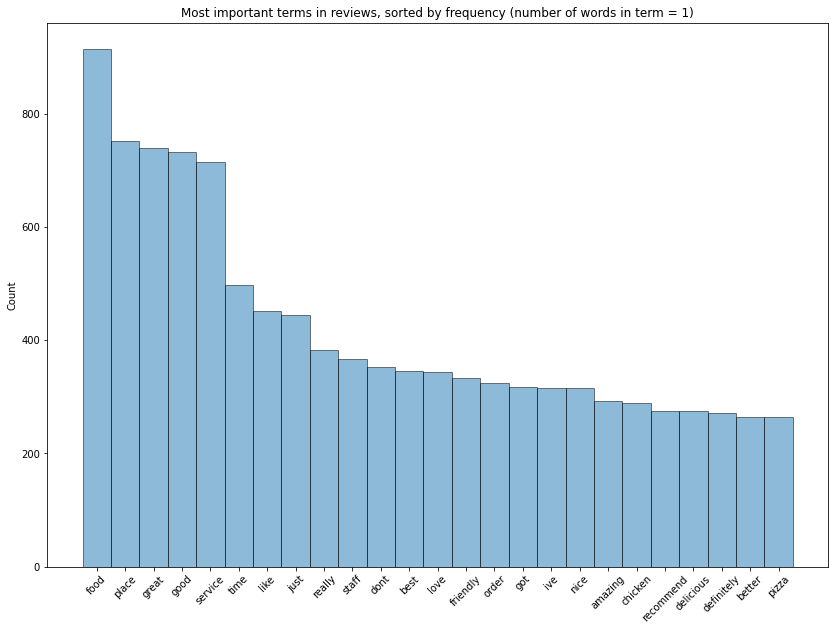

time: 5.72 s (started: 2021-12-10 09:29:20 +00:00)


In [ ]:
# plot top terms with number of words = 1 and number of words = 2
sorted_features, sorted_count = build_tfidf(1, Review_df['WithoutStopWords'])
plot_tfidf(sorted_features, sorted_count)
plt.title('Most important terms in reviews, sorted by frequency (number of words in term = {})'.format(1))

# Buisness Dataset

In [ ]:
url="/content/drive/MyDrive/Colab Notebooks/SML_Yelp/yelp_academic_dataset_business.json"
Business_df = pd.read_json(url, lines=True)

time: 4 s (started: 2021-12-10 09:29:25 +00:00)


In [ ]:
Business_df.isna().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      14992
categories        115
hours           27341
dtype: int64

time: 570 ms (started: 2021-12-10 10:19:55 +00:00)


In [ ]:
Business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


time: 47.3 ms (started: 2021-12-10 10:14:08 +00:00)


In [ ]:
Merged_buisness_review=pd.merge(Review_df, Business_df, on='business_id')
Merged_buisness_review.isna().sum()
Merged_buisness_review.head()

,Unnamed: 0,review_id,business_id,text,rating,sentiment,cleaned_tokens_uncased,Token_Count,cleaned_text_uncased,cleaned_tokens_cased,cleaned_text_cased,WithoutStopWords,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,205926,74jiSYdvwgNW88yb0iDU_g,H61GvE_VbTXtQbEgTPLchg,This place has made HUGE improvements since it...,5.0,1,"['This', 'place', 'has', 'made', 'HUGE', 'impr...",78.0,this place has made huge improvements since it...,"['this', 'place', 'has', 'made', 'huge', 'impr...",This place has made HUGE improvements since it...,this place huge improvements opened it took mo...,Howling Wolf Taqueria,76 Lafayette St,Salem,MA,01970,42.519292,-70.89373,4.0,964,1,"{'GoodForKids': 'True', 'BusinessParking': '{'...","Bars, Arts & Entertainment, Nightlife, Music V...","{'Tuesday': '11:30-20:0', 'Wednesday': '11:30-..."
1,729278,Ca5QbAYllNUQtryJUOeHQQ,H61GvE_VbTXtQbEgTPLchg,This place has a MEAN BEAN BURRITO IT LEGIT IS...,5.0,1,"['This', 'place', 'has', 'a', 'MEAN', 'BEAN', ...",73.0,this place has a mean bean burrito it legit is...,"['this', 'place', 'has', 'a', 'mean', 'bean', ...",This place has a MEAN BEAN BURRITO IT LEGIT IS...,this place mean bean burrito it legit is the b...,Howling Wolf Taqueria,76 Lafayette St,Salem,MA,01970,42.519292,-70.89373,4.0,964,1,"{'GoodForKids': 'True', 'BusinessParking': '{'...","Bars, Arts & Entertainment, Nightlife, Music V...","{'Tuesday': '11:30-20:0', 'Wednesday': '11:30-..."
2,258256,3hCuf_5WprxE9B8GZ80YuQ,H61GvE_VbTXtQbEgTPLchg,My favorite mexican restaurant The food is SO ...,5.0,1,"['My', 'favorite', 'mexican', 'restaurant', '!...",41.0,my favorite mexican restaurant the food is so ...,"['my', 'favorite', 'mexican', 'restaurant', '!...",My favorite mexican restaurant The food is SO ...,my favorite mexican restaurant the food so goo...,Howling Wolf Taqueria,76 Lafayette St,Salem,MA,01970,42.519292,-70.89373,4.0,964,1,"{'GoodForKids': 'True', 'BusinessParking': '{'...","Bars, Arts & Entertainment, Nightlife, Music V...","{'Tuesday': '11:30-20:0', 'Wednesday': '11:30-..."
3,644143,mmEx1JetVTd4yIHxlEBgGg,H61GvE_VbTXtQbEgTPLchg,The staff is great but the food isnt worth the...,2.0,0,"['The', 'staff', 'is', 'great', 'but', 'the', ...",78.0,the staff is great but the food isnt worth the...,"['the', 'staff', 'is', 'great', 'but', 'the', ...",The staff is great but the food isnt worth the...,the staff great food isnt worth price the al p...,Howling Wolf Taqueria,76 Lafayette St,Salem,MA,01970,42.519292,-70.89373,4.0,964,1,"{'GoodForKids': 'True', 'BusinessParking': '{'...","Bars, Arts & Entertainment, Nightlife, Music V...","{'Tuesday': '11:30-20:0', 'Wednesday': '11:30-..."
4,339511,PDVWFRhyqtqMgsOVmMdscg,H61GvE_VbTXtQbEgTPLchg,Chicken enchilada was ok the chicken tasted we...,2.0,0,"['Chicken', 'enchilada', 'was', 'ok', ',', 'th...",58.0,chicken enchilada was ok the chicken tasted we...,"['chicken', 'enchilada', 'was', 'ok', ',', 'th...",Chicken enchilada was ok the chicken tasted we...,chicken enchilada ok chicken tasted weird our ...,Howling Wolf Taqueria,76 Lafayette St,Salem,MA,01970,42.519292,-70.89373,4.0,964,1,"{'GoodForKids': 'True', 'BusinessParking': '{'...","Bars, Arts & Entertainment, Nightlife, Music V...","{'Tuesday': '11:30-20:0', 'Wednesday': '11:30-..."


time: 716 ms (started: 2021-12-10 09:29:29 +00:00)


Median review count 137.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



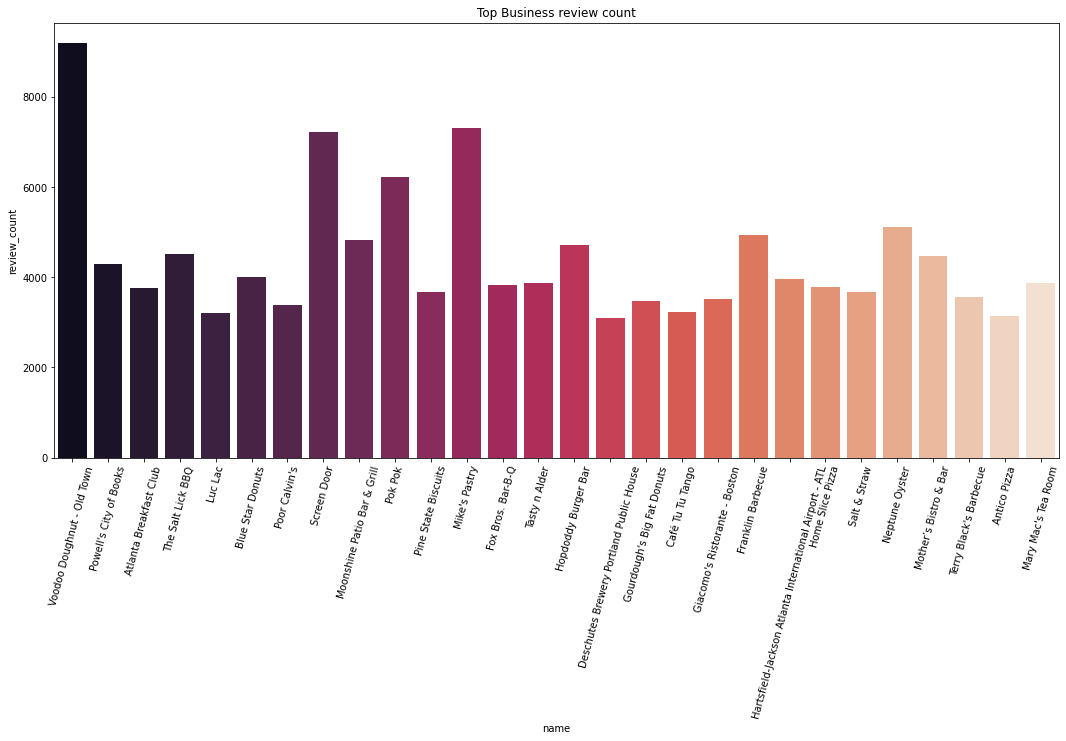

time: 1.61 s (started: 2021-12-10 10:16:36 +00:00)


In [ ]:
print('Median review count',Merged_buisness_review['review_count'].median())
plt.figure(figsize = (18,8))
sns.barplot(Merged_buisness_review[Merged_buisness_review['review_count'] >3000]['name'],Merged_buisness_review[Merged_buisness_review['review_count'] >3000]['review_count'],
           palette = 'rocket')
plt.xticks(rotation=75)
plt.title('Top Business review count');

In [ ]:
#Installing geopy and related packages for geographical plotting
!apt install gdal-bin python-gdal python3-gdal --quiet
!apt install python3-rtree --quiet
!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install descartes --quiet
!pip install geopy
!pip install plotly_express
!pip install ipython-autotime
!pip install tqdm==4.62
%load_ext autotime
import pandas as pd
import numpy as np
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import matplotlib.pyplot as plt
import plotly_express as px
import tqdm
from tqdm import tqdm

Reading package lists...
Building dependency tree...
Reading state information...
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 29.1 s (started: 2021-12-10 09:29:30 +00:00)


## Geographical representation of Number of ratings coming from each city


*   The size of circle represents the number of rating counts, Portland has the business with the highest number of ratings followed by Boston
*   If we zoom in to the location we can see the exact locations of the business



In [ ]:
import plotly_express as px
temp=Merged_buisness_review.copy()
temp['review_count']=temp['review_count'].apply(str)
px.scatter_mapbox(Merged_buisness_review, lat="latitude", lon="longitude",color_discrete_sequence= px.colors.sequential.RdBu_r , zoom=3, size="review_count" )

time: 550 ms (started: 2021-12-10 09:37:02 +00:00)


In [ ]:
import plotly_express as px
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")


time: 2.04 ms (started: 2021-12-10 09:30:00 +00:00)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Most number of reviewers ')

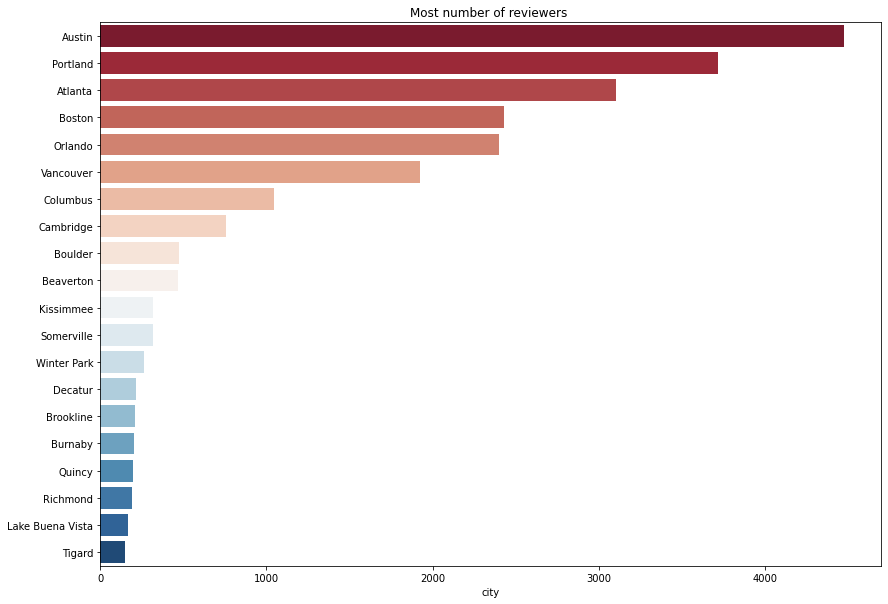

time: 582 ms (started: 2021-12-10 09:30:00 +00:00)


In [ ]:
plt.subplots(1,1,figsize=(14,10))
TopBuisness = Merged_buisness_review['city'].value_counts()[:20].to_frame()
sns.barplot(TopBuisness['city'], TopBuisness.index, palette = 'RdBu')
plt.title('Most number of reviewers ')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Top Buisness names')

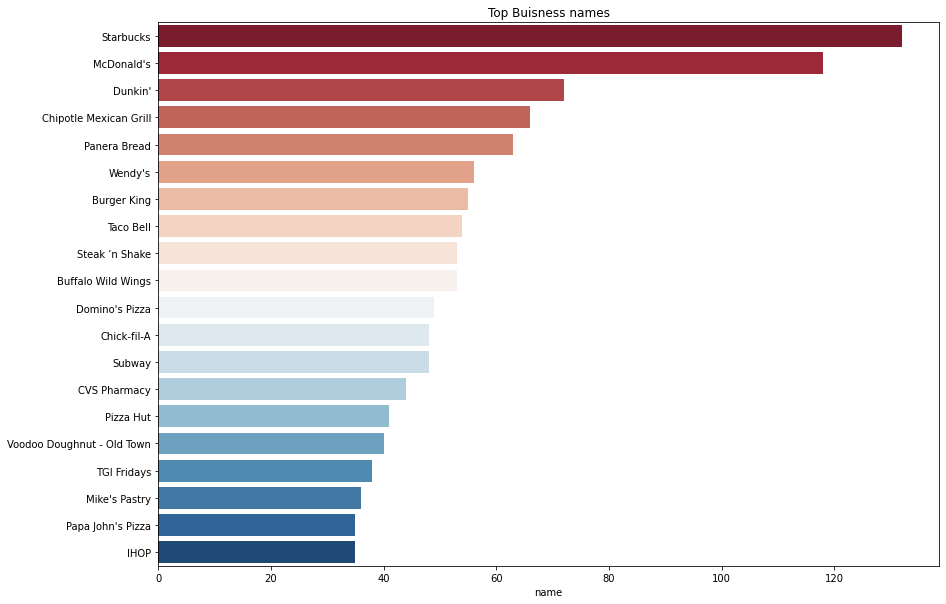

time: 503 ms (started: 2021-12-10 09:30:00 +00:00)


In [ ]:
plt.subplots(1,1,figsize=(14,10))
TopBuisness = Merged_buisness_review['name'].value_counts()[:20].to_frame()
sns.barplot(TopBuisness['name'], TopBuisness.index, palette = 'RdBu')
plt.title('Top Buisness names')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Top Categories of Buisness')

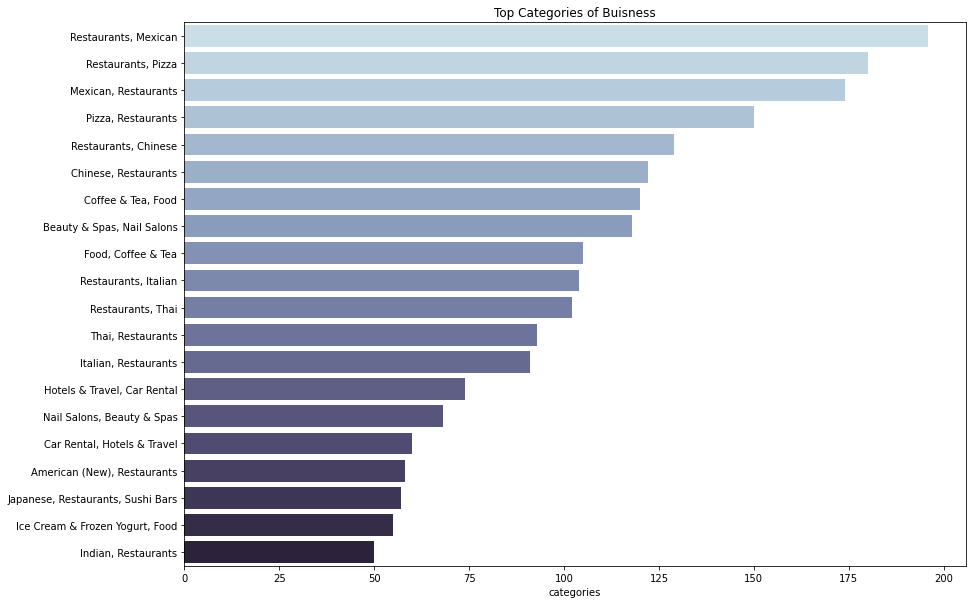

time: 553 ms (started: 2021-12-10 19:09:23 +00:00)


In [ ]:
plt.subplots(1,1,figsize=(14,10))
TopCat = Merged_buisness_review['categories'].value_counts()[:20].to_frame()
sns.barplot(TopCat['categories'], TopCat.index, palette = "ch:s=.25,rot=-.25")
plt.title('Top Categories of Buisness')

### If we observe the top categories of business with top rating counts:
  

*   we can see that top businesses  are Mexican restaurants, Pizza restaurants, Chinese Restaurants, Coffee & Tea places and Salons. Which shows that most number of business rated at Yelp are food places
*   15 out of 20 Top business rated are food businesses.
*   We can see redundancy in names because of changes in order of words.